In [32]:
import xarray as xr
import xesmf as xe
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy

import rasterio
import glob
import sys
import pickle


In [34]:
run ../util/setupConsole

In [25]:
dirChirts = '/dartfs-hpc/rc/lab/C/CMIG/CHIRTS'

In [53]:
tmax_ds = xr.open_dataset('%s/Tmax/netcdf/tmax_2010_07.nc'%dirChirts)
tmax_ds.load()

<xarray.Dataset>
Dimensions:  (lat: 2600, lon: 7200, time: 31)
Coordinates:
  * lat      (lat) float64 70.0 69.95 69.9 69.85 ... -59.85 -59.9 -59.95 -60.0
  * lon      (lon) float64 0.0 0.05001 0.1 0.15 0.2 ... 359.8 359.9 359.9 360.0
  * time     (time) datetime64[ns] 2010-07-01 2010-07-02 ... 2010-07-31
Data variables:
    tmax     (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    units:    degC
    name:     CHIRTS-TMAX

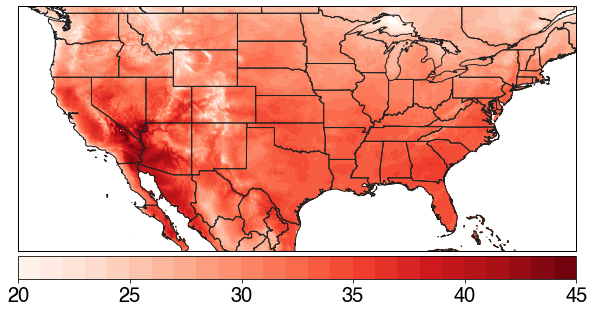

In [55]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -67, 23, 46])

v1 = 20
v2 = 45.01
vstep = 1
vlabelstep = 5

midnorm = MidpointNormalize(vmin=v1, vcenter=(v1+v2)/2, vmax=v2)
cmap = plt.cm.get_cmap('Reds')
c = plt.contourf(tmax_ds.lon, tmax_ds.lat, tmax_ds.tmax.mean(dim='time'), cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep))
# plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
scmap.set_array([])
cb = plt.colorbar(scmap, ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal',
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
# cb.set_label('CMIP6 ensemble median TXx trend\n($\degree$C/decade, 1979-2015)', fontsize=20)

# if wxData == 'gldas':
#     plt.savefig('obs-gdd-trend-cpc.png', format='png', dpi=200, bbox_inches = 'tight', pad_inches = 0)
# elif wxData == 'era5':
#     plt.savefig('obs-gdd-trend-era5.png', format='png', dpi=200, bbox_inches = 'tight', pad_inches = 0)